### 模型參數結構修改

1. Optimizer `SGD` --> `Adam` 
2. Batch_size 128 --> 32 --> 64
3. lr 0.005 --> 0.001 --> 0.002
4. Epoch 10 --> 15 --> 20
5. Loss function mse --> categorical_crossentropy
6. Activation function --> CNN: `Tanh`, Dense: `Relu`
7. 下圖為 model 的結構
    * 4 個 CNN (10, 15, 30 , 60) (padding: same)
    * 2 個 Maxpooling (2, 2)
    * 1 個 Dropout (drop 0.3)
    * 1 個 BatchNormalization
    * 3 個 Dense
8. result: train --> 91.95%, test --> 91.47% 兩者的結果非常相近

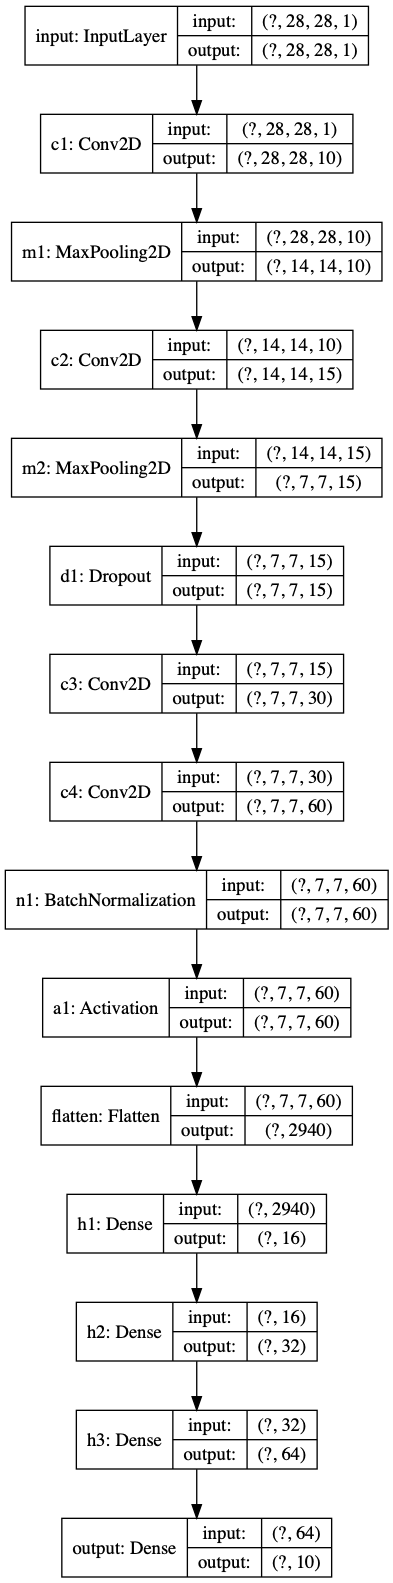

In [27]:
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='top')

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
NUM_CLASS = len(class_names)

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# this picture is a gray scale, so we need to reshape it to tell the machine that it just has one channel

x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from keras.models import Model
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras import Input

fashion_input = Input(shape=(28, 28, 1), name="input")
c1 = Convolution2D(filters=10, kernel_size=(3, 3), activation="tanh", padding="same", name="c1")(fashion_input)
m1 = MaxPooling2D(pool_size=(2,2), name="m1")(c1)
c2 = Convolution2D(filters=15, kernel_size=(3, 3), activation="tanh", padding="same", name="c2")(m1)
m2 = MaxPooling2D(pool_size=(2,2), name="m2")(c2)
d1 = Dropout(0.3, name="d1")(m2)
c3 = Convolution2D(filters=30, kernel_size=(3, 3), activation="tanh", padding="same", name="c3")(d1)
c4 = Convolution2D(filters=60, kernel_size=(3, 3), padding="same", name="c4")(c3)
# batch nornalization need to be before activation
n1 = BatchNormalization(name="n1")(c4)
a1 = Activation("tanh", name="a1")(n1)
flatten = Flatten(name="flatten")(a1)
h1 = Dense(units=16, activation="relu", name="h1")(flatten)
h2 = Dense(units=32, activation="relu", name="h2")(h1)
h3 = Dense(units=64, activation="relu", name="h3")(h2)
output = Dense(units=NUM_CLASS, activation="softmax", name="output")(h3)
model = Model(inputs=[fashion_input], outputs=output)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
c1 (Conv2D)                  (None, 28, 28, 10)        100       
_________________________________________________________________
m1 (MaxPooling2D)            (None, 14, 14, 10)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 14, 14, 15)        1365      
_________________________________________________________________
m2 (MaxPooling2D)            (None, 7, 7, 15)          0         
_________________________________________________________________
d1 (Dropout)                 (None, 7, 7, 15)          0         
_________________________________________________________________
c3 (Conv2D)                  (None, 7, 7, 30)          4080

In [9]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.002), metrics=["accuracy", "mse", "mae"])

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 46s 760us/step - loss: 0.5191 - accuracy: 0.8068 - mse: 0.0266 - mae: 0.0518
Epoch 2/20
60000/60000 [==============================] - 47s 782us/step - loss: 0.3869 - accuracy: 0.8581 - mse: 0.0201 - mae: 0.0391
Epoch 3/20
60000/60000 [==============================] - 47s 779us/step - loss: 0.3451 - accuracy: 0.8731 - mse: 0.0180 - mae: 0.0350
Epoch 4/20
60000/60000 [==============================] - 43s 711us/step - loss: 0.3233 - accuracy: 0.8812 - mse: 0.0169 - mae: 0.0330
Epoch 5/20
60000/60000 [==============================] - 44s 726us/step - loss: 0.3048 - accuracy: 0.8883 - mse: 0.0160 - mae: 0.0313
Epoch 6/20
60000/60000 [==============================] - 51s 850us/step - loss: 0.2921 - accuracy: 0.8924 - mse: 0.0154 - mae: 0.0301
Epoch 7/20
60000/60000 [==============================] - 42s 699us/step - loss: 0.2821 - accuracy: 0.8960 - mse: 0.0148 - mae: 0.0291
Epoch 8/20
60000/60000 [==============================]

In [14]:
loss, score, mse, mae = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 190us/step


In [18]:
print(f"score:{score*100: .2f}%\nloss:{loss: .4f}\nmae:{mae: .4f}\nmse:{mse: .4f}")

score: 91.47%
loss: 0.2476
mae: 0.0224
mse: 0.0124


Text(0,0.5,'Loss')

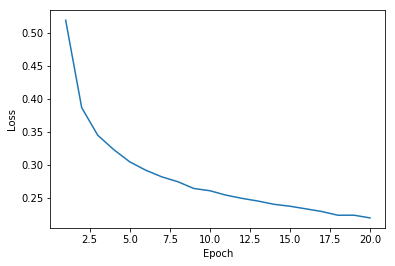

In [24]:
plt.plot(np.arange(1, 21), history.history["loss"], label="categorical_crossentropy")
plt.xlabel('Epoch')
plt.ylabel('Loss')

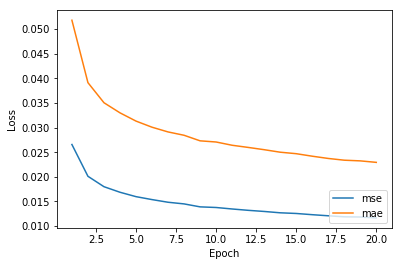

In [25]:
plt.plot(np.arange(1, 21), history.history["mse"], label="mse")
plt.plot(np.arange(1, 21), history.history["mae"], label="mae")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Text(0,0.5,'Accuracy')

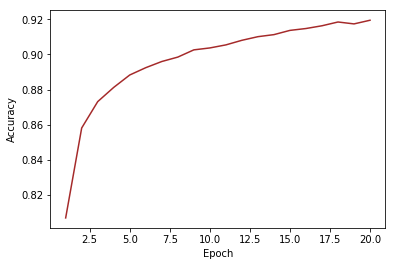

In [26]:
plt.plot(np.arange(1, 21), history.history["accuracy"], c="brown", label="accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')